**Planar robotic arm**

Given two links of length ***L1*** and ***L2***, both articulated and arranged at a certain angle ϴ, we want to find the final visualization of both links and the path traveled.


**Visualization by iterations**

In this format, we will identify each Newton process by iteration.



In [ ]:
def plot_iterations_step_by_step(history, L1, L2, xd, yd, angles_in_degrees=True):
    """Draws the arm at each iteration and shows the angles."""
    for k, h in enumerate(history):
        plt.figure(figsize=(6,6))

        # arm coordinates
        pts = forward_points(h["theta"], L1, L2)
        xs, ys = zip(*pts)
        plt.plot(xs, ys, '-o', color="blue", label=f"Iter {k}")

        # destination
        plt.plot([xd], [yd], 'gx', markersize=10, label="Destination")

        # aesthetics
        reach = L1 + L2
        plt.xlim(-reach-0.1, reach+0.1)
        plt.ylim(-reach-0.1, reach+0.1)
        plt.gca().set_aspect("equal")
        plt.grid(True)
        plt.legend()

        # show angles
        t1, t2 = h["theta"]
        if angles_in_degrees:
            t1, t2 = np.degrees(t1), np.degrees(t2)
            plt.title(f"Iter {k} | θ1={t1:.2f}°, θ2={t2:.2f}° | ||F||={h['f_inf']:.2e}")
        else:
            plt.title(f"Iter {k} | θ1={t1:.4f} rad, θ2={t2:.4f} rad | ||F||={h['f_inf']:.2e}")

        plt.show()

In [ ]:
L1, L2 = 1.0, 0.8
xd, yd = -1.5, 1.5
theta0 = [0.1, 0.1]

res = newton_ik(L1, L2, xd, yd, theta0)
plot_iterations_step_by_step(res.history, L1, L2, xd, yd, angles_in_degrees=True)

**Now a complete visualization of the arm's path**

We start from iteration 0, where both arms are extended but with an angular deviation from the x-axis. We also find the trace of each iteration and the arm in its final position.


In [ ]:
def plot_full_trajectory(history, L1, L2, xd, yd):
    """Draws all arm iterations in the same plane."""
    plt.figure(figsize=(7,7))
    end_points = []

    for k, h in enumerate(history):
        pts = forward_points(h["theta"], L1, L2)
        xs, ys = zip(*pts)

        # draw arm for this iteration
        plt.plot(xs, ys, '-o', alpha=0.3)

        # save end effector position
        end_points.append(pts[-1])

    # draw end effector trajectory
    ex, ey = zip(*end_points)
    plt.plot(ex, ey, '--k', linewidth=1.5, label="Newton points trajectory")

    # initial arm in blue
    xs, ys = zip(*forward_points(history[0]["theta"], L1, L2))
    plt.plot(xs, ys, '-o', alpha=0.5, color="blue", linewidth=1, label="Initial")

    # final arm in red
    xs, ys = zip(*forward_points(history[-1]["theta"], L1, L2))
    plt.plot(xs, ys, '-o', color="red", linewidth=2, label="Final")

    # destination
    plt.plot([xd], [yd], 'gx',linewidth=2, markersize=15, label="Destination")

    reach = L1 + L2
    plt.xlim(-reach-0.2, reach+0.2)
    plt.ylim(-reach-0.2, reach+0.2)
    plt.gca().set_aspect("equal")
    plt.grid(True)
    plt.legend()
    plt.title("Arm trajectory in the plane")
    plt.show()

In [ ]:
 L1, L2 = 1.0, 0.8
xd, yd = 1.2, 0.2
theta0 = [0.1, 0.1]

res = newton_ik(L1, L2, xd, yd, theta0)
plot_full_trajectory(res.history, L1, L2, xd, yd)

**Visualization of the example in question**

In this case, we will take the example with the iterations one by one and then the Cartesian plane with the trajectory (Newton's method path).

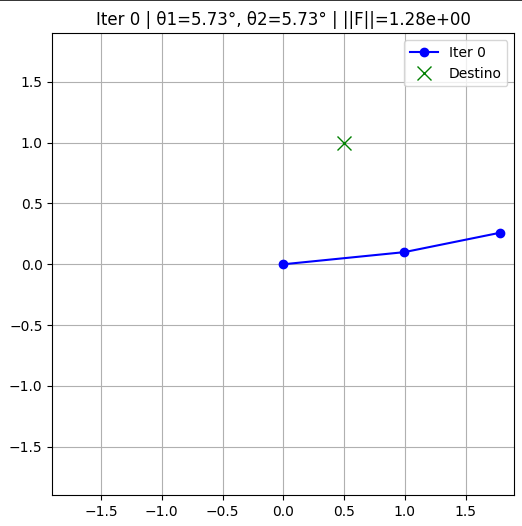

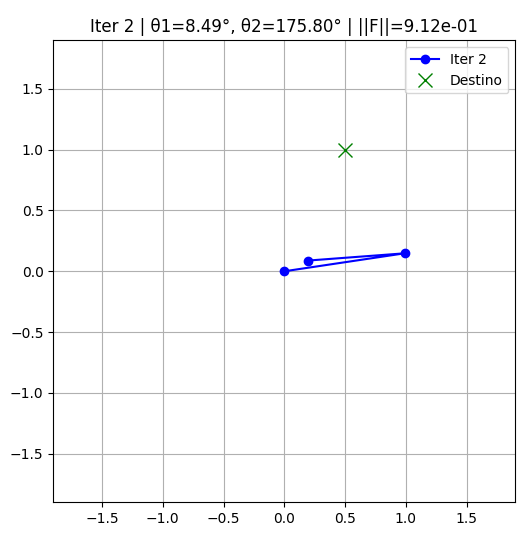

